<a href="https://colab.research.google.com/github/chitransh0052/Machine-learning/blob/main/Bank_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [44]:
data=pd.read_csv('/content/bank_transactions.csv')

In [45]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [47]:
data.shape

(1048567, 9)

In [48]:
data.isnull().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,3397
CustGender,1100
CustLocation,151
CustAccountBalance,2369
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0


In [51]:
from sklearn.preprocessing import LabelEncoder
categorical_features=['TransactionID','CustomerID','CustomerDOB','CustGender','CustLocation','CustAccountBalance','TransactionDate','TransactionTime','TransactionAmount(INR)']
label_encoders={}
for col in categorical_features:
    # Check if the column exists in the DataFrame
    if col in data.columns:
        le=LabelEncoder()
        data[col]=le.fit_transform(data[col])
        label_encoders[col]=le
    else:
        print(f"Column '{col}' not found in the DataFrame. Skipping...")

Column 'TransactionAmount(INR)' not found in the DataFrame. Skipping...


In [52]:
# Drop the column using its original name
data.drop(columns=['TransactionAmount (INR)'], inplace=True)

In [53]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [54]:
# Dimensionality reduction
numerical_features = data.select_dtypes(include=np.number).columns
numerical_data = data[numerical_features]
pca=PCA(n_components=2)
reduced_data=pca.fit_transform(numerical_data)
data['PCA1'] = reduced_data[:, 0]
data['PCA2'] = reduced_data[:, 1]

In [55]:
#clustering using k-means
kmeans=KMeans(n_clusters=3,random_state=42)
data['Cluster']=kmeans.fit_predict(data[['PCA1','PCA2']])

In [56]:
#calculate distance of each point from its cluster center
data['ClusterDistance']=np.sqrt(
    (data['PCA1']-kmeans.cluster_centers_[:, 0][data['Cluster']][0])**2 +
    (data['PCA2']-kmeans.cluster_centers_[:, 1][data['Cluster']][1])**2)

In [57]:
# define threshold for anomalies(eg, top 5% of distance)
threshold = data['ClusterDistance'].quantile(0.95)
data['Anomaly'] = data['ClusterDistance'] > threshold

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


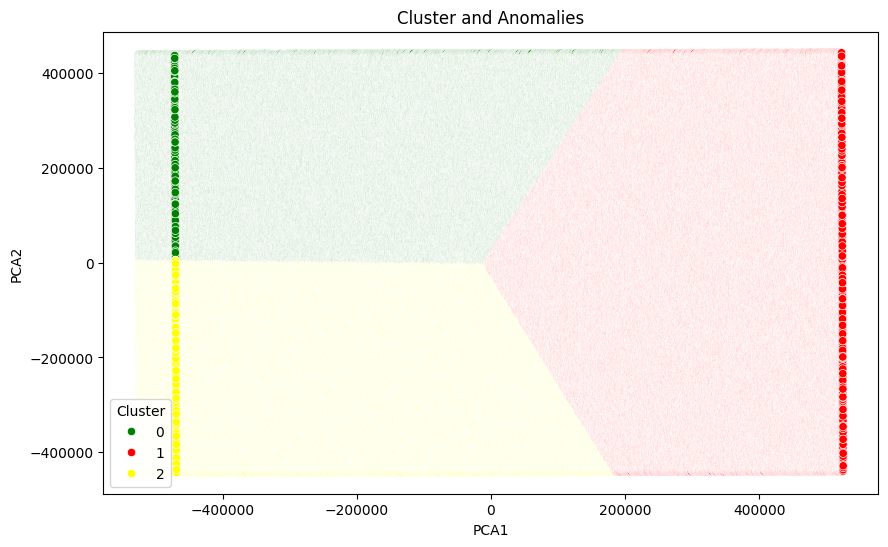

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster',data=data, palette=['green','red','yellow'])
plt.title('Cluster and Anomalies')
plt.legend(title='Cluster')
plt.show()

change DOB to AGE then print Scatter **plot** **bold text**


In [104]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data=pd.read_csv('/content/bank_transactions.csv')

# Assuming the DOB column is named 'CustomerDOB' and is in a datetime format
# If not, convert the column to datetime first:
data['CustomerDOB'] = pd.to_datetime(data['CustomerDOB'])

# Calculate the age based on the current date
current_date = pd.to_datetime('today')
# Changed 'DOB' to 'CustomerDOB' to refer to the actual column name
data['Age'] = (current_date - data['CustomerDOB']).dt.days // 365.25

# Display only the 'Age' column
print(data['Age'])

<ipython-input-104-9b52ba4074a0>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['CustomerDOB'] = pd.to_datetime(data['CustomerDOB'])


0          30.0
1         -33.0
2          28.0
3         -49.0
4          36.0
           ... 
1048562    34.0
1048563    32.0
1048564    35.0
1048565    46.0
1048566    40.0
Name: Age, Length: 1048567, dtype: float64


In [105]:
# Drop rows where 'Age' is negative
data = data[data['Age'] >= 0]

# Display the updated DataFrame
print(data.head())

  TransactionID CustomerID CustomerDOB CustGender CustLocation  \
0            T1   C5841053  1994-10-01          F   JAMSHEDPUR   
2            T3   C4417068  1996-11-26          F       MUMBAI   
4            T5   C9031234  1988-03-24          F  NAVI MUMBAI   
6            T7   C7126560  1992-01-26          F       MUMBAI   
7            T8   C1220223  1982-01-27          M       MUMBAI   

   CustAccountBalance TransactionDate  TransactionTime  \
0            17819.05          2/8/16           143207   
2            17874.44          2/8/16           142712   
4             6714.43          2/8/16           181156   
6              973.46          2/8/16           173806   
7            95075.54          2/8/16           170537   

   TransactionAmount (INR)   Age  
0                     25.0  30.0  
2                    459.0  28.0  
4                   1762.5  36.0  
6                    566.0  32.0  
7                    148.0  42.0  


In [106]:
data.shape

(939968, 10)

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 939968 entries, 0 to 1048566
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   TransactionID            939968 non-null  object        
 1   CustomerID               939968 non-null  object        
 2   CustomerDOB              939968 non-null  datetime64[ns]
 3   CustGender               939082 non-null  object        
 4   CustLocation             939857 non-null  object        
 5   CustAccountBalance       937821 non-null  float64       
 6   TransactionDate          939968 non-null  object        
 7   TransactionTime          939968 non-null  int64         
 8   TransactionAmount (INR)  939968 non-null  float64       
 9   Age                      939968 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 78.9+ MB


In [108]:
data.isnull().sum()

,0
TransactionID,0
CustomerID,0
CustomerDOB,0
CustGender,886
CustLocation,111
CustAccountBalance,2147
TransactionDate,0
TransactionTime,0
TransactionAmount (INR),0
Age,0


In [118]:
from sklearn.preprocessing import LabelEncoder
categorical_features=['TransactionID','CustomerID','CustGender','CustLocation','CustAccountBalance','TransactionDate','TransactionTime','TransactionAmount(INR)','Age']
label_encoders={}
for col in categorical_features:
    # Check if the column exists in the DataFrame
    if col in data.columns:
        le=LabelEncoder()
        data[col]=le.fit_transform(data[col])
        label_encoders[col]=le
    else:
        print(f"Column '{col}' not found in the DataFrame. Skipping...")

Column 'TransactionAmount(INR)' not found in the DataFrame. Skipping...


In [119]:
data.columns

Index(['TransactionID', 'CustomerID', 'CustGender', 'CustLocation',
       'CustAccountBalance', 'TransactionDate', 'TransactionTime',
       'TransactionAmount (INR)', 'Age', 'PCA1', 'PCA2', 'Cluster',
       'ClusterDistance', 'Anomaly'],
      dtype='object')

In [120]:
# Dimensionality reduction
numerical_features = data.select_dtypes(include=np.number).columns
numerical_data = data[numerical_features]
pca=PCA(n_components=2)
reduced_data=pca.fit_transform(numerical_data)
data['PCA1'] = reduced_data[:, 0]
data['PCA2'] = reduced_data[:, 1]

In [121]:
#clustering using k-means
kmeans=KMeans(n_clusters=3,random_state=42)
data['Cluster']=kmeans.fit_predict(data[['PCA1','PCA2']])

In [122]:
#calculate distance of each point from its cluster center
data['ClusterDistance']=np.sqrt(
    (data['PCA1']-kmeans.cluster_centers_[:, 0][data['Cluster']][0])**2 +
    (data['PCA2']-kmeans.cluster_centers_[:, 1][data['Cluster']][1])**2)

In [123]:
# define threshold for anomalies(eg, top 5% of distance)
threshold = data['ClusterDistance'].quantile(0.95)
data['Anomaly'] = data['ClusterDistance'] > threshold

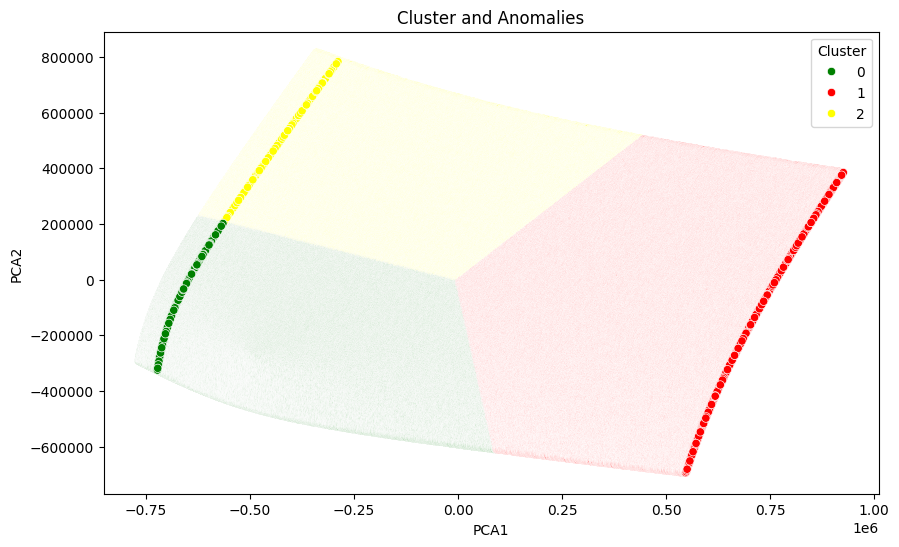

In [124]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster',data=data, palette=['green','red','yellow'])
plt.title('Cluster and Anomalies')
plt.legend(title='Cluster')
plt.show()